**Цели проекта:** 
- Сформировать и предоставить заказчику портрет сегментов **для** последущих принятий решений в отношении сегментов 
- составить и предоставить заказчику перечень предполагаемых причин оттока **для** принятия решений в пользу сокращения оттока пользователей

**Задачи:**
- Провести исследовательский анализ
- Сегментировать пользоватлей по общему признаку
- Проверить гипотезы
- Построить графики
- Предсставить результаты

### Декомпозиция
### <a href='#step1'>Шаг. 1 - Знакомство с данными.</a>
- Выгрузить данные
- Применить методы для просмотра общей информации
- Сделать промежуточные выводы
### <a href='#step2'> Шаг. 2 - Предобработка данных.</a>
- Переименовать столбцы (если потребуется)
- Проверить данные на пропуски
- Проверить количество дубликатов
- Привести значения к нужным типам
- Сделать промежуточные выводы
### <a href='#step3'>Шаг. 3 - Исследовательский анализ данных. </a>
- Построение матрицы корреляции
- Построение гистограмм распределения
- Сделать промежуточные выводы
- Разделение пользователей на сегменты по количеству используемых продуктов
- Проанализировать, какой из сегментов склонен к оттоку (отказу от услуг).
- Построение графиков
### <a href='#step4'>Шаг. 4 - Проверка гипотез </a>
- Формулировка и проверка гипотез
- Проверка гипотезы о равенстве зарплат у пользователей с 1-им и 2-мя продуктами
- Проверка гипотезы о равенстве долей ушедших пользователей М И Ж
- Сделать промежуточные выводы
### <a href='#step5'>Шаг. 5 - Выводы и рекомендации </a>
### <a href='#step6'>Шаг. 6 - Сделать презентацию по проведенным исследованиям </a>
- Обозначить: цели, задачи
- Поместить графики (сделать их информативными и интуитивно понятными)
- Без углубления в статистические аспекты преподнести выводы по гипотезам
- Написать краткие выводы к каждому слайду
- Написать общий вывод

---

**Импорт данных**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import scipy.stats as st
import math as mth
warnings.filterwarnings("ignore")

# Занкомство с данными <a id='step1'></a>

**Импортируем данные**

In [2]:
try:
    data=pd.read_csv('/datasets/bank_dataset.csv')
    
except:
    data=pd.read_csv('bank_dataset.csv')

**Выводим 'шапку' датасета**

In [3]:
data.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


**Данные не требуют изменения типов, пропуски есть только в столбце "Баланс". Единственное, что стоит поменять для удобства - это привести столбцы к нижнему регистру и в некторых привести к "змеиному" регистру**

In [5]:
data.columns = [x.lower() for x in data.columns.values]

In [6]:
data = data.rename(columns={'userid': 'user_id', 'creditcard': 'credit_card'})

**Выведем гистограммы по всем параметрам, для начального понимания**

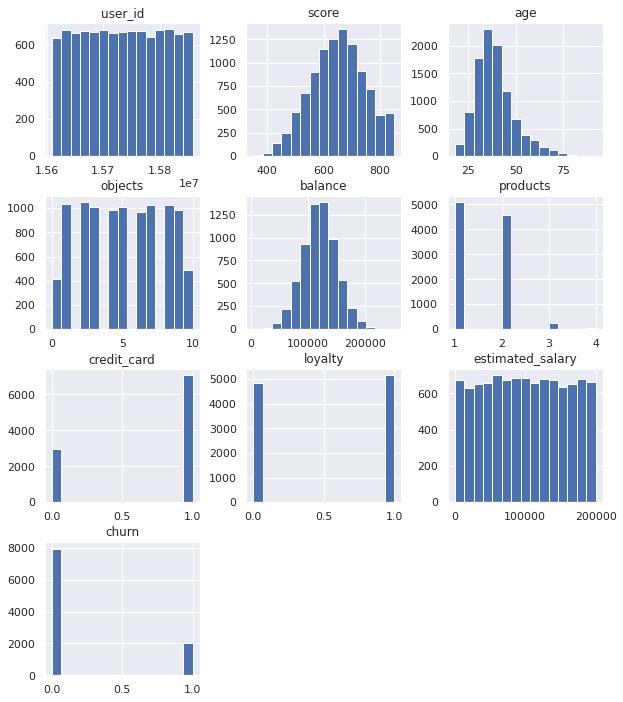

In [7]:
sns.set(rc={'figure.figsize':(10,12)})
data.hist(bins=15);

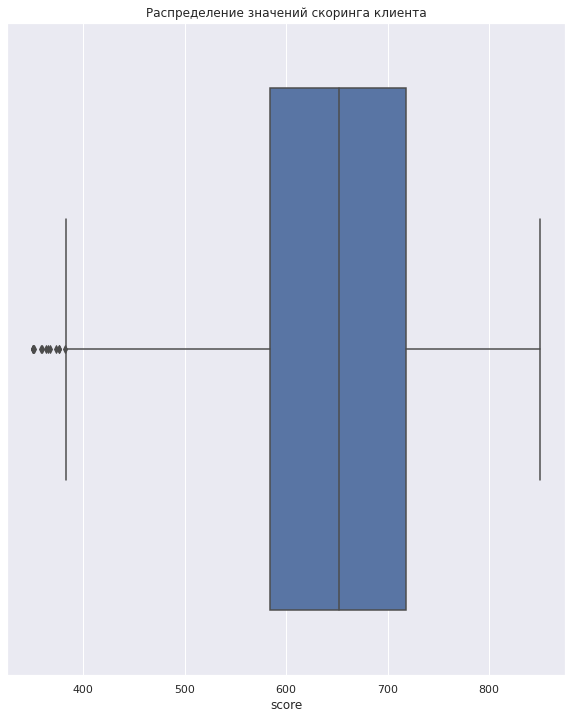

In [8]:
sns.boxplot(x=data["score"])
plt.title('Распределение значений скоринга клиента');

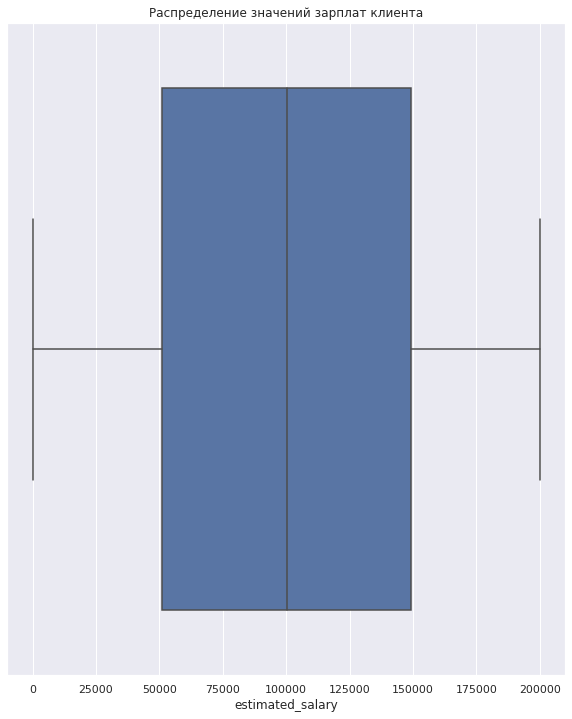

In [9]:
sns.boxplot(x=data["estimated_salary"])
plt.title('Распределение значений зарплат клиента');

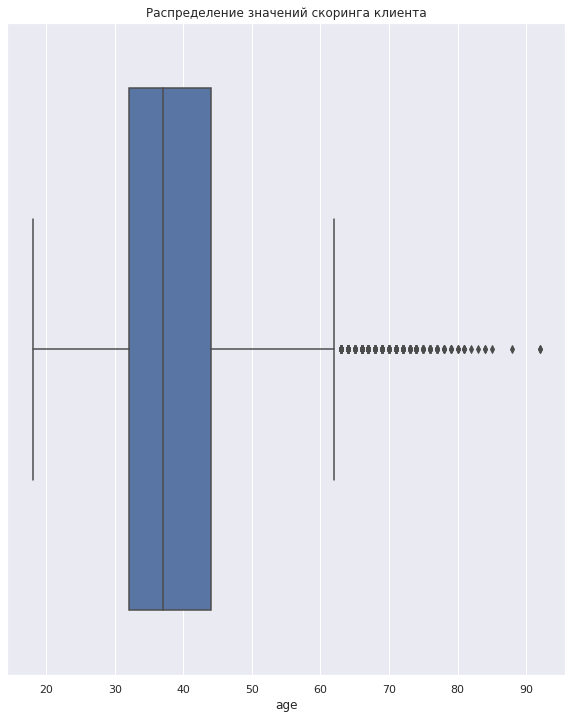

In [10]:
sns.boxplot(x=data["age"])
plt.title('Распределение значений скоринга клиента');

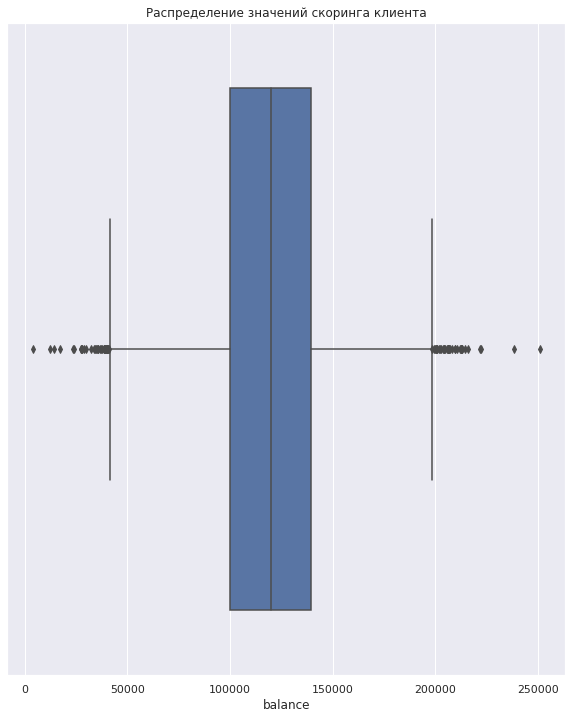

In [11]:
sns.boxplot(x=data["balance"])
plt.title('Распределение значений скоринга клиента');

**Боксплоты не показывают критических выбросов в количественных параметрах**

**Выводы по Ознакомлению с данными**

**В данных не замечено каких - либо критических выбросов и аномалий.**
* Большинство значений столбца age находится в диапозоне 30-40 лет
* Баланс распределен "нормально"
* Ушедших пользователей ~ 2000 ед. из 10000 присутствубщих в датасете
* ~ 7000 ед. являются владельцами кредитных карт банка
* Соотношение лояльных и не лояльных пользователей примерно одинаково
* Распределение по продуктом неравномерно, наблюдается сильный спад в диапозоне от 2-ух до 3-х продуктов 
* Скоринг распределен "нормально", большинство значений расположено в диапозоне 650-700, после чего идет на спад. На максимальном значении спад прекращается, возможно это связано с тем, что если у пользователя не было ни одной просрочки или другого 'нарушения' ему присваивается максимальный рейтинг

# Предобработка <a id='step2'></a>

In [12]:
data['user_id'].nunique()

10000

Каждый пользователь уникален соответственно мы не найдем дубликатов

In [13]:
data.duplicated().sum()

0

In [14]:
data.isna().sum()

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

**В столбце с балансом 3617 пропущенных значений. Удалив их мы лишимся большой части данных. Заполнив их по среднему значению по какому либо параметру внесет изменения (сместит среднее и медиану). Поэтому заполнять пропуски в этом случае считаю нецелесообразною.**

---

# Исследовательский анализ данных <a id='step3'></a>

**Используем метод пандаса get_dummies, для перевода категориальных значений в бинарный формат**

In [15]:
df = pd.get_dummies(data)

**Построим тепловую карту корреляции значений**

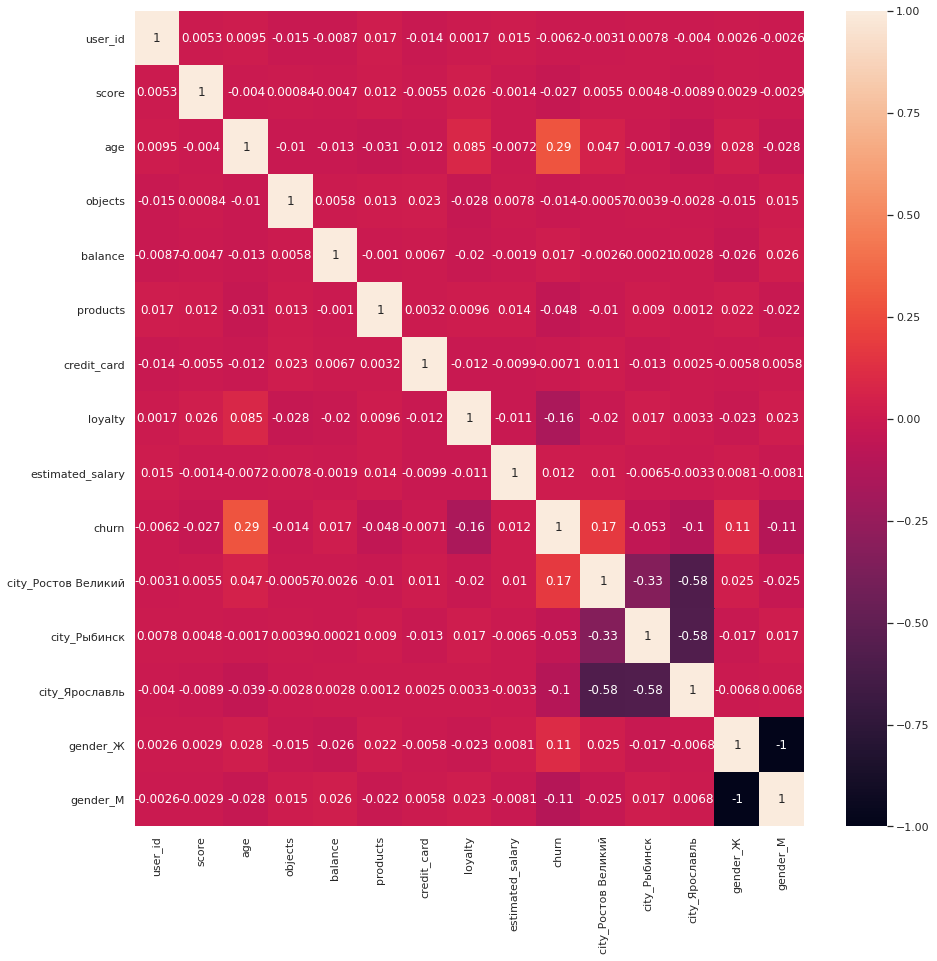

In [16]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot=True);

**Значительных корреляций в датасете не обнаружено. Незначительные корреляции есть в отношении параметров:**
* отток - возраст (0.29)
* отток - лояльность (отрицательная корреляция (-0.16)
* город Ростов Великий - отток (0.17)
* город Ярославль - отток (-0.1)
* Мужской пол - отток (-0.11), женский пол в оттоку диаметрально противоположен (0.11)    

**Сегментация параметров:**


**Количественные:**
* возраст
* баланс
* заработная плата
* своринг

**Категориальные:**
* город
* пол
* лояльность
* отток
* наличие кредитной карты
* объекты (под залог)
* продукты банка

**Создадим датасеты состоящие из категориальных данных и количественных**

In [17]:
data_category = data[['city', 'gender', 'loyalty', 'churn', 'credit_card', 'objects', 'products']]
data_equal = data[['age', 'estimated_salary', 'score']]

**Создадим словарь с переводом названия столбцов на русский, чтобы автоматизировать подписи к графикам**

In [18]:
names_dict = {'city': 'город',
              'gender': 'пол',
              'loyalty': 'лояльность',
              'churn': 'отток',
              'credit_card': 'кредитка',
              'objects': 'объекты',
              'products': 'продукты',
              'age': 'возраст',
              'balance': 'баланс',
              'estimated_salary': 'зарплата',
              'score': 'скоринг'}

**Напишем цикл для подсчета пользователей по категориальным признакам**

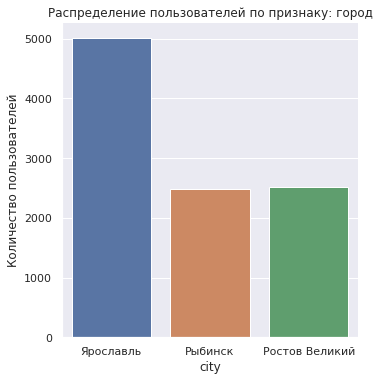

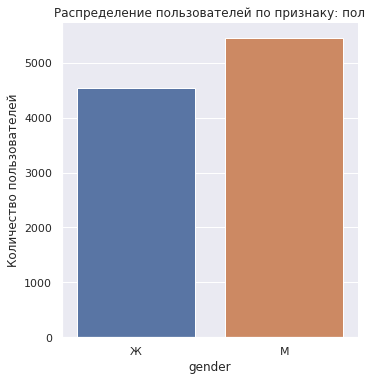

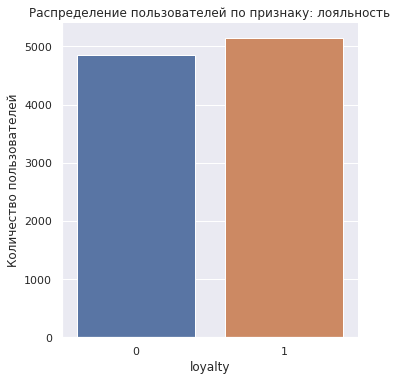

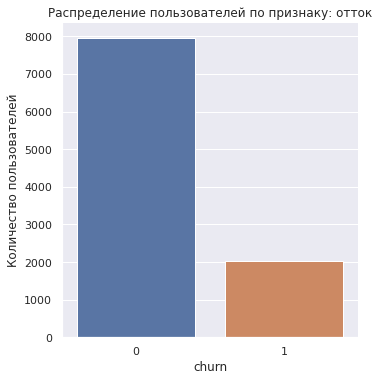

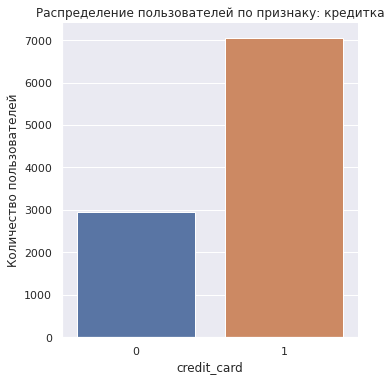

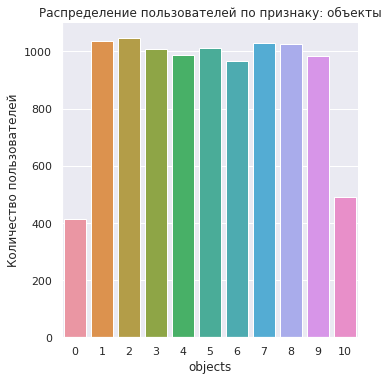

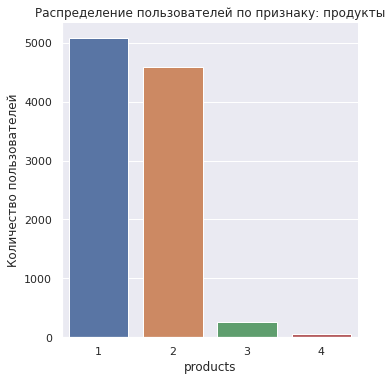

In [19]:
for column in data_category.columns:
    sns.catplot(x=column, kind='count', data=data)
    plt.title(f'Распределение пользователей по признаку: {names_dict[column]}')
    plt.ylabel('Количество пользователей');

* Половина пользователей банка живут в Ярославле, остальные пользователи почти равно распределены между остальными городами
* Мужчин в датасете больше чем женщин
* Активных (лояльных пользователей) больше чем не активных
* ~2000 пользователей ушли ~ 20% всего датасета
* ~7000 пользователей являются держателями кредитных карт банка
* Распределение по количеству объектов равнозначно для диапозона 1-9 объектов. Почти в 2 раза меньше 0 и 10 объектов.
* У больше чем половины пользователей - всего 1 продукт банка, у чуть меньшего количества пользователей - 2. Гораздо меньше пользователей у которых 3 и 4 продукта банка

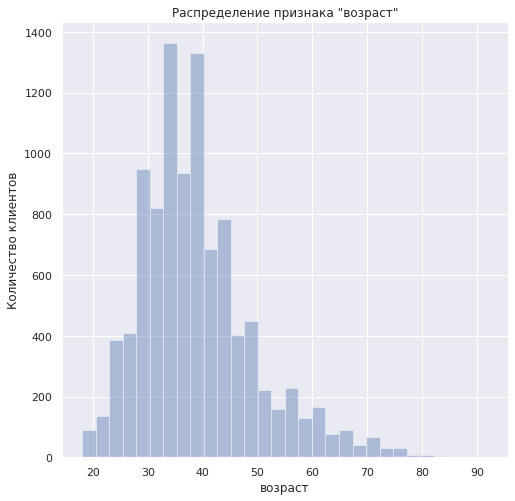

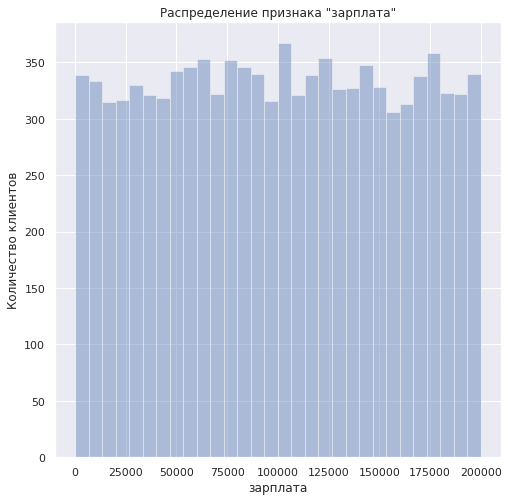

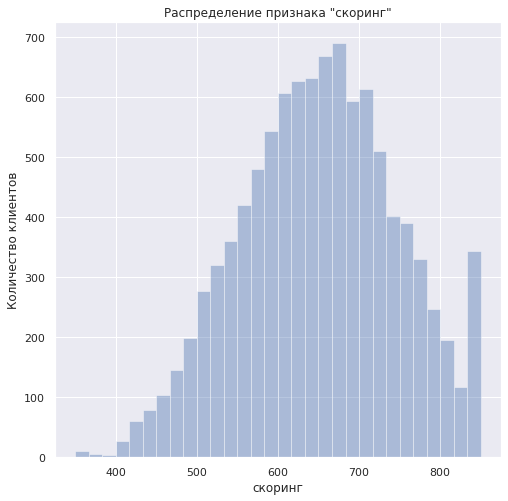

In [20]:
sns.set(rc={'figure.figsize':(8,8)})
for col in data_equal.columns:
    sns.distplot(data[col], kde=False, bins=30)
    plt.title(f'Распределение признака "{names_dict[col]}"')
    plt.xlabel(names_dict[col])
    plt.ylabel('Количество клиентов')
    plt.show()

<AxesSubplot:>

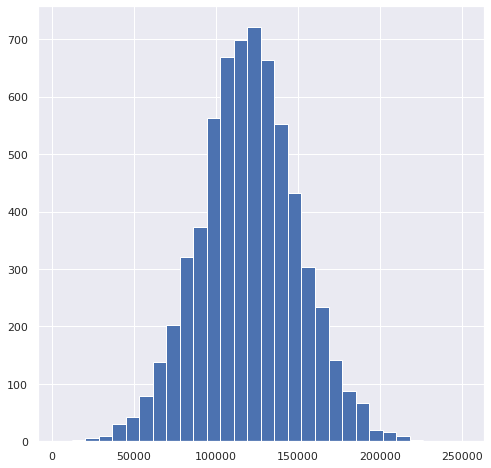

In [21]:
data['balance'].hist(bins=30)

Проверим числовые данные на нормальность

Нулевая гипитеза для каждой выборки:

H0: данные распределены нормально

H1: данные распределены не нормально

In [22]:
from scipy import stats as st

alpha = .05 

results = st.shapiro(data['score'])
p_value = results[1]
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  3.532837989895404e-20
Отвергаем нулевую гипотезу: распределение не нормально


In [23]:
results = st.shapiro(data['balance'])
p_value = results[1]
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  1.0
Не получилось отвергнуть нулевую гипотезу, всё нормально


In [24]:
results = st.shapiro(data['age'])
p_value = results[1]
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [25]:
results = st.shapiro(data['estimated_salary'])
p_value = results[1]
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


**Нормальное распределение имеет только столбец - баланс, Скоринг, возраст и зарплата распределены не нормально**

**Каждый количественный параметр распределены без значимых выбросов. Данные близки к нормальному распределению**
* возраст ЦА банка 30-40 лет
* баланс рядового пользователя 100000 - 150000
* Зарплата распределяется равномерно среди всех пользователей
* Выброс на пиковых значениях в скоринге, может быть вызван системой присуждения рейтинга

**Нам нужно уделить особое внимание оттоку. Разделим датасеты на ушедших и не ушедших**

In [26]:
data_churn_0 = data.query('churn == 0')
data_churn_1 = data.query('churn == 1')

In [27]:
def churn_category(col):
    churn_0 = data_churn_0[col]
    churn_1 = data_churn_1[col]

    sns.distplot(churn_0, kde=False, bins=30, norm_hist=True)
    sns.distplot(churn_1, kde=False, bins=30, norm_hist=True)
    
    plt.title(f'Распределение по признаку - "{names_dict[col]}"')
    plt.ylabel('Количество клиентов')
    plt.legend(labels = ['клиент', 'отток'])
    

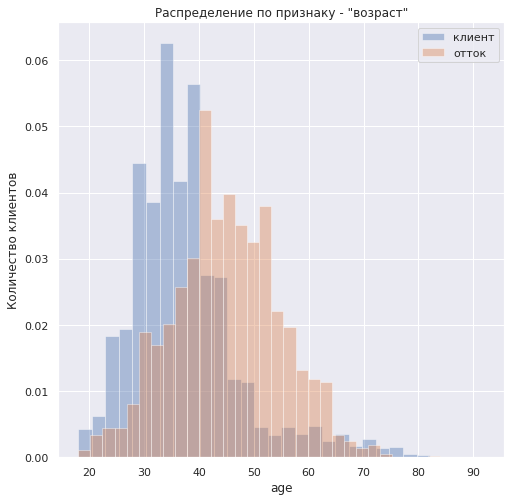

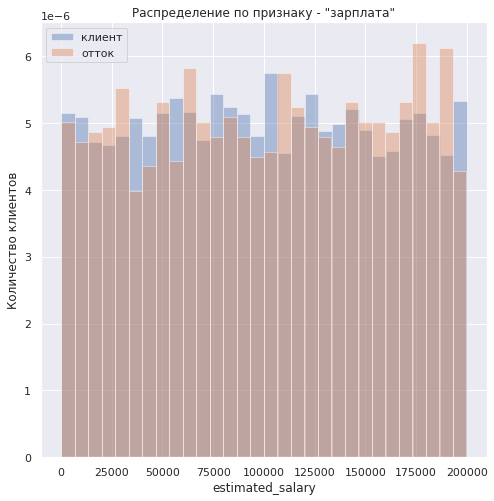

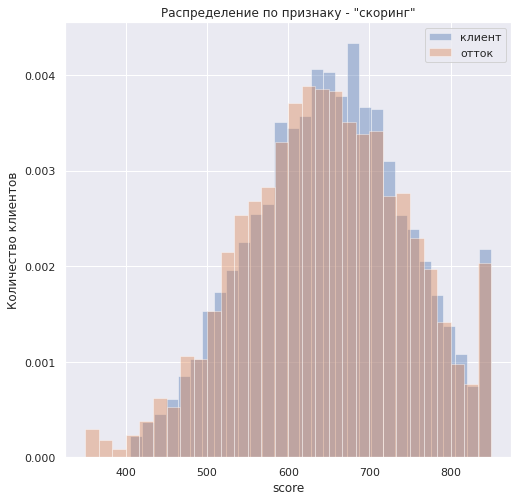

In [28]:
for col in data_equal.columns:
    churn_category(col)
    plt.show()

**На полученных графиках можно заметить, что пользователи в возрасте 40+ лет, склонны отказываться от услуг банка. (корреляция пары: возраст - отток была самой высокой в сравнении с остальными). Так же можно заметить, что среди действуюших клиентов банка - нет пользователей с оценкой (скорингом) меньше 400.**

---

In [29]:
def get_percentage_of_churn(col):
    data_values = data[col].value_counts() # хранит значения всего дф
    data_churn_values = data_churn_1[col].value_counts() # хранит значения ушедших пользователей по тому или иному признаку (col)
    percentage = ((data_churn_values/ data_values) * 100).round(2)
    print(f'Процент ушедших пользователей в категории "{names_dict[col]}"')
    print(percentage)

In [30]:
def get_category_plot(category):
    data_plot = data.groupby(category, as_index=False).agg({'user_id': 'count', 'churn': 'sum'})
    data_plot.columns=[category, 'id_cnt', 'churn_cnt']
    data_plot['id_cnt'] = data_plot['id_cnt'] - data_plot['churn_cnt']
    data_plot.columns=[category, 'не ушел', 'ушел']
    
    data_plot.plot(kind='bar',x=category, stacked=True, color=['blue', 'green'])
    plt.title(f'Распределение ушедших и неушедших пользователей в категории {names_dict[category]}')
    plt.xticks(rotation=360)
    plt.xlabel(names_dict[category])
    plt.ylabel('Количество');
    

Процент ушедших пользователей в категории "город"
Ростов Великий    32.44
Рыбинск           16.67
Ярославль         16.15
Name: city, dtype: float64


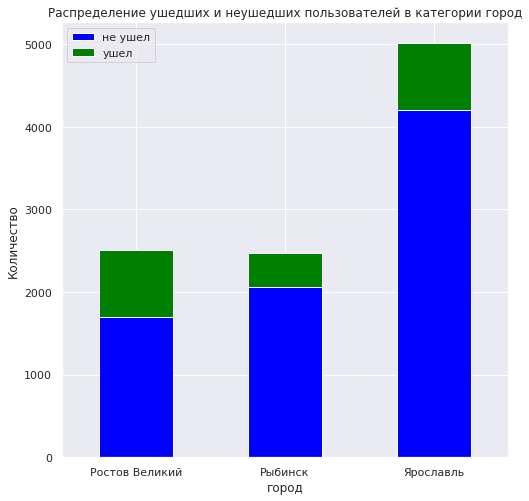

In [31]:
get_category_plot('city')
get_percentage_of_churn('city');

**Самый высокий процент оттока в городе Ростов великий, в Рыбинске и Ярославле почти одинаковый процент оттока**

Процент ушедших пользователей в категории "пол"
Ж    25.07
М    16.46
Name: gender, dtype: float64


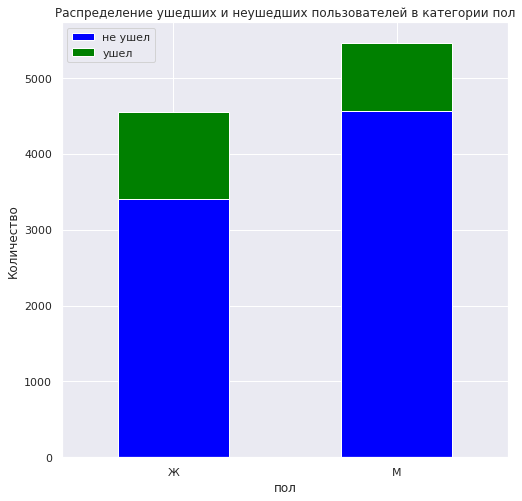

In [32]:
get_category_plot('gender')
get_percentage_of_churn('gender');

**Женщин болше, чем мужчин по проценту оттока**

Процент ушедших пользователей в категории "лояльность"
0    26.85
1    14.27
Name: loyalty, dtype: float64


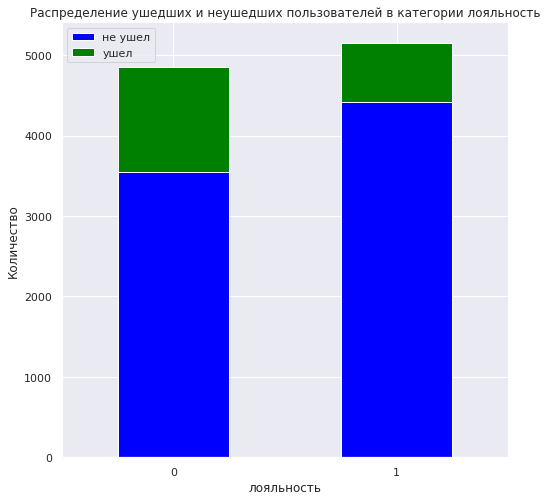

In [33]:
get_category_plot('loyalty')
get_percentage_of_churn('loyalty');

**Отток активных пользователей гораздо меньше чем не активных**

Процент ушедших пользователей в категории "кредитка"
1    20.18
0    20.81
Name: credit_card, dtype: float64


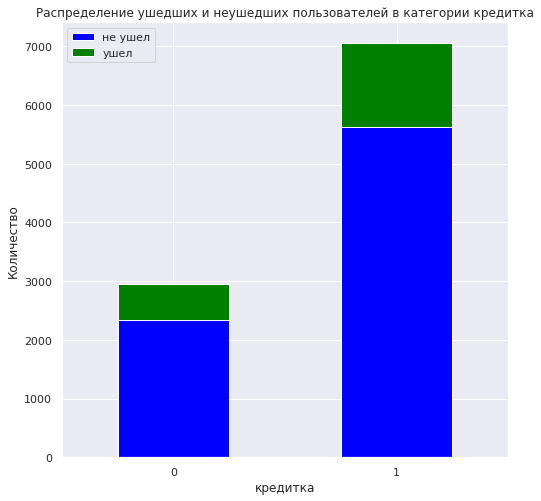

In [34]:
get_category_plot('credit_card')
get_percentage_of_churn('credit_card');

**Отток пользователей, владеющих кредитной картой банка, такой же, как и у тех, кто ею не владеет**

Процент ушедших пользователей в категории "объекты"
0     23.00
1     22.42
2     19.18
3     21.11
4     20.53
5     20.65
6     20.27
7     17.22
8     19.22
9     21.65
10    20.61
Name: objects, dtype: float64


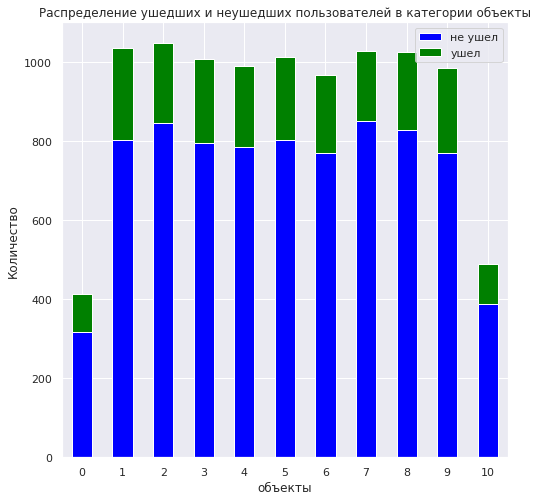

In [35]:
get_category_plot('objects')
get_percentage_of_churn('objects');

**Процент ушедших пользователей в разрезе по количеству объектов не имеет сильных всплесков оттока по какому-либо количеству объектов**  

Процент ушедших пользователей в категории "продукты"
1     27.71
2      7.58
3     82.71
4    100.00
Name: products, dtype: float64


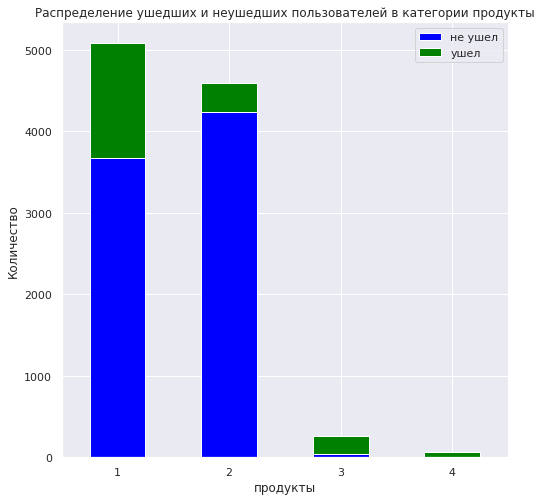

In [36]:
get_category_plot('products')
get_percentage_of_churn('products');

**Самые большие показатели оттока среди пользовователей с 1-им, 3-мя и 4-мя продуктами**

Итог по анализу категориальных параметров:
* Большой отток среди пользователей с 1 продуктом (27.71%), а так же среди владельцев 3-х продуктов (82.71%) и 4-х продуктов (100%)
* График по гендерному признаку показывает, что женщины уходят чаще (25.07%), отток среди мужчин (16.46%)
* Владельцы кредитных карт уходят в 20.18% процентах случаев, пользователи не имеющие кредитной карты уходят в 20.81%. Т.Е. почти равны и схожи со средним процентом ухода по всему датасету
* В разрезе по городам : Ростов великий - 32.44% ухода, Ярославль - 16.15%, Рыбинск - 16.67%.
* Лояльность: Уход не лояльных пользователей: 26.85% , уход лояльных пользователей - 14.27%.

Портрет пользователей склонных к уходу:
* гендер: Женщина
* Активность: Не активен
* Место проживания: город Ростов Великий
* Количество продуктов: Является пользователем 1, 3 или 4-ех продуктов
* Возраст: 40+ лет

**Функция сегментации по возрасту**

In [37]:
def get_age_category(value):
    if 18 <= value <= 29:
        return 'до 30 лет'
    elif 30 <= value <= 44:
        return 'от 30 до 45 лет'
    else:
        return 'от 45'
    
df['age_category'] = data['age'].apply(get_age_category)

In [38]:
df.groupby('age_category').agg({'estimated_salary': 'mean',
                                'balance':'mean',
                                'churn': 'mean',
                                'gender_М': 'mean',
                                'gender_Ж': 'mean',
                                'city_Рыбинск': 'mean',
                                'city_Ярославль': 'mean',
                                'city_Ростов Великий': 'mean',
                                'products': 'mean',
                                'loyalty': 'mean'}) 

,estimated_salary,balance,churn,gender_М,gender_Ж,city_Рыбинск,city_Ярославль,city_Ростов Великий,products,loyalty
age_category,,,,,,,,,,
до 30 лет,100855.247818,121181.961202,0.075564,0.542962,0.457038,0.245582,0.527727,0.226691,1.556977,0.510055
от 30 до 45 лет,99715.392311,119690.941280,0.144376,0.560724,0.439276,0.249543,0.509719,0.240738,1.539458,0.494434
от 45,100517.944795,119299.063853,0.446154,0.508974,0.491026,0.244444,0.461538,0.294017,1.487607,0.571795


После сегментации по возрасту, можно заметить тенденцию роста оттока с ростом возрастной категорий. Средний баланс и зарплата в сегментах не имеют больших отличий. В городе Ярославль Находятся около 50% пользователей каждой возрастной категории.

In [39]:
data.groupby(['city', 'gender']).agg({'user_id': 'count', 'churn': 'mean', 'estimated_salary': 'mean', 'credit_card': 'mean'})

user_id     churn  estimated_salary  credit_card
city           gender                                                  
Ростов Великий Ж          1193  0.375524     102446.424124     0.706622
               М          1316  0.278116      99905.033959     0.720365
Рыбинск        Ж          1089  0.212121     100734.107475     0.707989
               М          1388  0.131124      98425.687680     0.684438
Ярославль      Ж          2261  0.203450      99564.252755     0.697921
               М          2753  0.127134     100174.252495     0.713767

In [40]:
prod_churn = data.groupby(['products', 'gender'], as_index=False).agg({'user_id': 'count',
                                          'age': 'mean',
                                          'churn': 'mean'})
prod_churn

,products,gender,user_id,age,churn
0,1,Ж,2296,40.030488,0.331882
1,1,М,2788,39.378766,0.232066
2,2,Ж,2060,37.917476,0.101942
3,2,М,2530,37.620158,0.054545
4,3,Ж,149,43.597315,0.865772
5,3,М,117,42.683761,0.777778
6,4,Ж,38,45.894737,1.000000
7,4,М,22,45.318182,1.000000


**Сегментация по фозрасту:**

18-29 лет - средняя зарплата 100 тыс., средний остаток на счете 120 тыс., процент оттока 7%, преобладающе - мужчина, обладатель 1.5 продуктов в среднем.


30-44 лет - средняя зарплата 100тыс., средний остаток на счете 120 тыс., процент оттока 14%, преобладающе - мужчины, обладатель 1.5 продуктов в среднем

от 45 лет - средняя зарплата 100тыс., средний остаток на счете 120 тыс., процент оттока 44%, преобладающе - мужчины, обладатель 1.5 продуктов в среднем



**Сегментация по количеству продуктов:**

1 продукт - преобладающе - мужчина, медианный возраст 38(м), 39(ж)

2 продукт - преобладающе - мужчина, медианный возраст 36(м), 36(ж)

3 продукт - преобладающе - женщина, медианный возраст 41(м), 43(ж)

4 продукт - преобладающе - женщина, медианный возраст 45(м), 46(ж)

**Сегментация по городам:**

Пользователи разделеные по городу не обладают принципиальными отличиями параметров, кроме процента оттока пользователей. В городе Ростов Великий процент оттока выше среднего, чем по всему датасету. 


In [41]:
churn_age = df.groupby('age_category', as_index=False).agg({'churn': 'mean'})
churn_age

,age_category,churn
0,до 30 лет,0.075564
1,от 30 до 45 лет,0.144376
2,от 45,0.446154


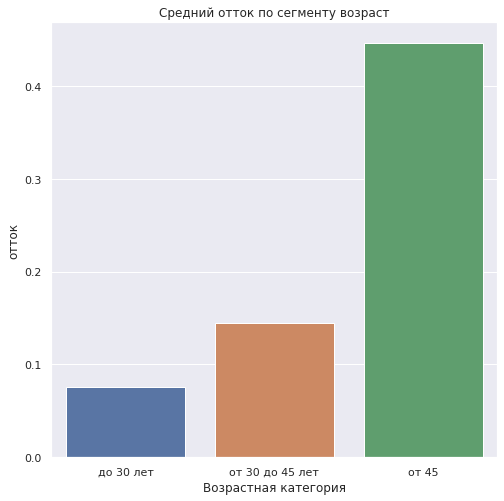

In [42]:
sns.barplot(x='age_category', y='churn', data=churn_age)
plt.title('Средний отток по сегменту возраст')
plt.xlabel('Возрастная категория')
plt.ylabel('отток');

сегмент 18-29 - отток 7%, процент ниже среднего

сегмент 30-44 - отток 14%, процент ниже среднего

сегмент 45+ - отток 44%, процент выше среднего 

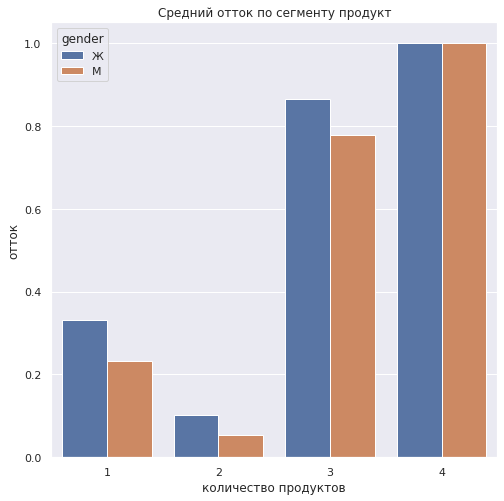

In [43]:
sns.barplot(x='products', y='churn', data=prod_churn, hue='gender')
plt.title('Средний отток по сегменту продукт')
plt.xlabel('количество продуктов')
plt.ylabel('отток');

Можно сказать, что условия банка больше подходят молодым людям, нежели людям в возрасте, необходимо принять действия для сокращения оттока в сегменте 45+ лет, например разработать тариф для людей в возрасте с выгодными условиями


сегмент 1 продукт - ж(33% оттока) м(23% оттока) - отток выше среднего

сегмент 2 продукт - ж(10% оттока) м(5% оттока) - отток ниже среднего

сегмент 3 продукт - ж(86% оттока) м(77% оттока) - отток выше среднего

сегмент 4 продукт - ж(100% оттока) м(100% оттока) - отток выше среднего



# Проверка гипотез <a id='step4'></a>

# Гипотезы 1

Проверьте гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

**Разделим датасеты на количества продуктов, чтобы передать их функции**

In [44]:
product_1 = data.query('products == 1')
product_2 = data.query('products == 2')

**H0: Доход клиентов пользующихся 1-им продуктом банка равен доходу клиентов пользующимся 2-мя продуктами банка.**

**H1: Доход клиентов пользующихся 1-им продуктом банка не равен доходу клиентов пользующимся 2-мя продуктами банка.**

In [45]:
alpha = .05
def whitney_test (data1, data2, alpha):
    
    p_value = st.mannwhitneyu(data1, data2).pvalue
    
    print(p_value)
    if (p_value < alpha):
        print('Отвергаем нулевую гипотезу, есть статистически значимая разница')
    else:
        print('Не удалось отвергнуть нулевую гипотезу, статистически значимой разницы нет')

whitney_test(product_1['estimated_salary'], product_2['estimated_salary'], alpha)        

0.4079566651927651
Не удалось отвергнуть нулевую гипотезу, статистически значимой разницы нет


**Проверка гипотезы показала, что у нас нет оснований считать доходы клиентов с одним и двумя продуктами разными.**

---

# Гипотезы 2

**H0: Доля ушедших пользователей женского пола, равна доле ушедших пользователей мужского пола.**

**H1: Доля ушедших пользователей женского пола,  не равна доле ушедших пользователей мужского пола.**

Подготовим переменные для использования их в функции.

In [46]:
data_gender_m = len(data[data['gender'] == 'М'])
data_gender_w = len(data[data['gender'] == 'Ж'])
data_churn_m = len(data[(data['gender'] == 'М') & data['churn'] == 1])
data_churn_w = len(data[(data['gender'] == 'Ж') & data['churn'] == 1])

Подготовим функцию z-теста для проверки доль ушедших пользователей по гендерам

In [47]:
alpha = 0.05
def z_test (churn_1, churn_2, gender_1, gender_2):
    

    p1 = churn_1/gender_1

    p2 = churn_2/gender_2

    p_combined = (churn_1 + churn_2) / (gender_1 + gender_2)

    difference = p1 - p2 

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/gender_1 + 1/gender_2))


    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('p-значение: {0:.5f}'.format(p_value))

    
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        ) 

In [48]:
z_test(data_churn_w, data_churn_m, data_gender_w, data_gender_m)

p-значение: 0.00000
Отвергаем нулевую гипотезу: между долями есть значимая разница


**z-test показал, что у нас нет оснований не отвергнуть нулевую гипотезу. Между долями есть статистически значимая разница.**

---

# Выводы:

Нам предаставленны данные состоящие из 10.000 записей. Перед анализом, я выполнил базовую предобработку: заменил названия столбцов на удобные, проверил на дубликаты и пропуски. Принял решение не удалять и не заполнять пропуски, чтобы не внести массивные коррективы в общую картину.

В ходе исследовательского анализа данных я не заметил критических аномалий и выбивающихся значений. Все количественные параметры распределены "нормально". 
Так как нам надо было уделить особое внимание оттоку, мы построили функции для визуализации клиентов попавших в отток и процент ушедших в категориальных переменных.

В результате исследования мы составили портрет среднестатистического клиента склонного к оттоку:

* гендер: Женщина
* Активность: Не активен
* Место проживания: город Ростов Великий
* Количество продуктов: Является пользователем 1, 3 или 4-ех продуктов
* Возраст: 40+ лет

Стоит заметить, что перечень этих факторов не стоит воспринимать в совокупности, он лишь предоставляет общую информацию о клиентах.

В ходе статистического анализа мы проверили гипотезы:
* О равенстве зарплат между пользователями с одним продуктом и двумя
* О равендстве долей оттока по гендерному признаку

Гипотеза о равенстве зарплан подтвердилась тестом манна-уитни.
Гипотеза о равенстве долей оттока по гендерному признаку проверяли z-тестом, гипотеза не подтвердилась, среди долей оттока есть значимая разница.

---

# Выводы по сегментации:

Итоги по сегментации:

по количеству продуктов - владельцами 1-го или 2-ух продуктов преобладающе являются мужчины, мы можем предложить им еще один или несколько продуктов банка в соответствии с типичными мужскими нуждами.

По возрасту: 

Средние Параметры по сегменту возраст не имеют значимых различий по большинству атрибутов. Отток в сегментах 18-29 лет и 30-44 лет. Процент оттока у людей старше 45-ти лет - больше среднего, чем по всему датасету и составляет 44%. Возможно в банке есть выгодные условия для молодых людей и нет факторов повышения лояльности для клиентов в возрасте. Стоит придумать стратегию (или продукты) для повышения активности пользователей в сегменте 45+ лет. 

**Сегментация по фозрасту:**

18-29 лет - средняя зарплата 100 тыс., средний остаток на счете 120 тыс., процент оттока 7%, преобладающе - мужчина, обладатель 1.5 продуктов в среднем. - Предложить открыть продукты, подходящие к этой возрастной категории

30-44 лет - средняя зарплата 100тыс., средний остаток на счете 120 тыс., процент оттока 14%, преобладающе - мужчины, обладатель 1.5 продуктов в среднем - Разработать продукты или тарифы повышающие лояльность пользователей этой возрастной категории

от 45 лет - средняя зарплата 100тыс., средний остаток на счете 120 тыс., процент оттока 44%, преобладающе - мужчины, обладатель 1.5 продуктов в среднем - Разработать продукты или тарифы повышающие лояльность пользователей этой возрастной категории



**Сегментация по количеству продуктов и рекомендации к каждому сегменту:**

Характеристики:

1 продукт - преобладающе - мужчина, медианный возраст 38(м), 39(ж)

2 продукт - преобладающе - мужчина, медианный возраст 36(м), 36(ж)

3 продукт - преобладающе - женщина, медианный возраст 41(м), 43(ж)

4 продукт - преобладающе - женщина, медианный возраст 45(м), 46(ж)

сегмент 1 продукт  - ж(33% оттока) м(23% оттока) - отток выше среднего - предложить открыть еще несколько продуктов банка

сегмент 2 продукт - ж(10% оттока) м(5% оттока) - отток ниже среднего - предложить открыть еще 1 или 2 продукта

сегмент 3 продукт - ж(86% оттока) м(77% оттока) - отток выше среднего - Для владельцев 3 и 4 продуктов необходимо разработать 
поощряющие тарифы, для поднятия активности и сокращения оттока

сегмент 4 продукт - ж(100% оттока) м(100% оттока) - отток выше среднего 
